<a href="https://colab.research.google.com/github/macgyver121/DADS6003/blob/main/Week06-Regularization/Lab3_use_ridge_losso.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multivariate linear regresion

# **Normal equation**

theta =  [-26.7405953   46.20215542  -5.04125804   3.37581693]
y predict =  [-146.71266643  244.82491962]


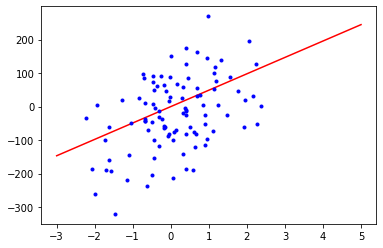

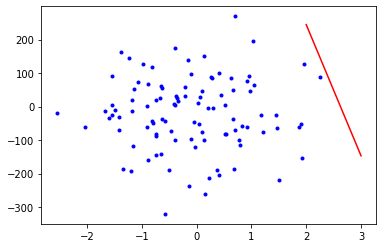

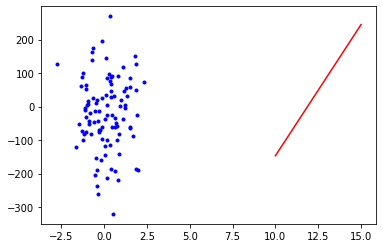

In [32]:
import numpy as np
from sklearn.datasets import make_regression

x, y = make_regression(n_samples=100, n_features=3, n_informative=1, random_state=0, noise=100)
x_b = np.c_[np.ones((x.shape[0],1)),x]

#call inverse function from linear algebra module
theta_best = np.linalg.inv(x_b.T.dot(x_b)).dot(x_b.T).dot(y)
print("theta = ", theta_best)

#prediction
x_n = np.array([[-3,3,10],[5,2,15]])
x_n_b = np.c_[np.ones((x_n.shape[0],1)), x_n]
y_p = x_n_b.dot(theta_best)
print("y predict = ",y_p)

import matplotlib.pyplot as plt
plt.plot(x_n[:,0], y_p,"r-")
plt.plot(x[:,0],y, "b.")
plt.show()

plt.plot(x_n[:,1], y_p,"r-")
plt.plot(x[:,1],y, "b.")
plt.show()

plt.plot(x_n[:,2], y_p,"r-")
plt.plot(x[:,2],y, "b.")
plt.show()


Exercise1 <br>
1.1 Change a number of features to 4 and plot 4 graphs

# **Sklearn**

-26.740595297087438  ,  [46.20215542 -5.04125804  3.37581693]
y predict =  [-146.71266643  244.82491962]


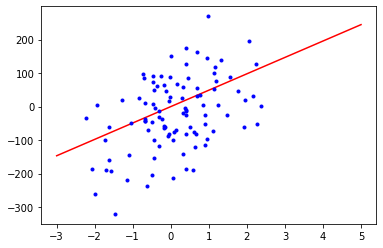

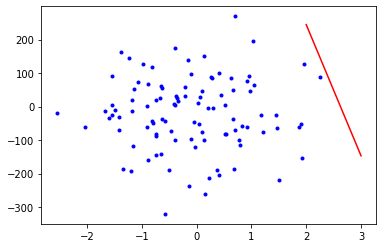

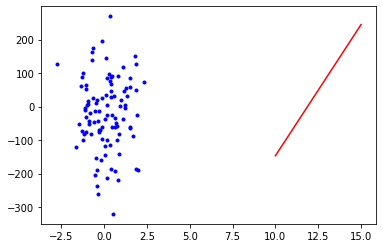

In [33]:
import numpy as np
from sklearn.linear_model import LinearRegression 

#x, y = make_regression(n_samples=1000, n_features=2, n_informative=1, random_state=0, noise=100) 
lin_reg = LinearRegression()
lin_reg.fit(x, y)
print(lin_reg.intercept_, " , ", lin_reg.coef_)


#prediction
#x_n = np.array([[-3,3],[5,2]])
y_p = lin_reg.predict(x_n)
print("y predict = ",y_p)

import matplotlib.pyplot as plt
plt.plot(x_n[:,0], y_p,"r-")
plt.plot(x[:,0],y, "b.")
plt.show()

plt.plot(x_n[:,1], y_p,"r-")
plt.plot(x[:,1],y, "b.")
plt.show()

plt.plot(x_n[:,2], y_p,"r-")
plt.plot(x[:,2],y, "b.")
plt.show()

# **Batch Gradient descent (Multiple linear regression)**


Converged, iterations:  1555 / 100000
theta  [[-26.74041472]
 [ 46.20202283]
 [ -5.04110474]
 [  3.37571369]]


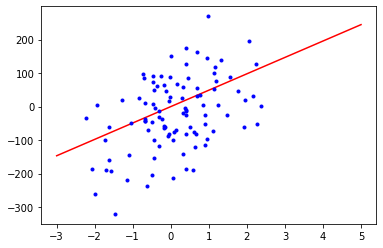

BGD
Mean of Squared Errors =  9321.122053295749
R2 score =  0.1915055787151715


In [34]:
import numpy as np
import random
import sklearn
import matplotlib.pyplot as plt
from scipy import stats

def cost_function(theta, x, y, m):
    
    y_predict = theta.T.dot(x.T)
    #print("y_predict ",y_predict)
    error = np.sum((y_predict-y)**2)
    #print("error ", error)
    return error

def gradient_descent(alpha, x, y, ep=0.0000001, max_iter=10000):

    converged = False
    iter = 0
    m = x.shape[0] # number of samples

    # initial theta
    t = np.random.random((x.shape[1],1))
    #t = np.ones((x.shape[1],1))
    #print("t ", t)
  
    # total error, J(theta)
    J = cost_function(t,x,y,m)
    #print("Iteration 0 --> J=",J," t0=",t0," t1=",t1)

    # Iterate Loop
    while not converged:
        
        #print("theta.shape ",t.shape)
        #print("x.shape ",x.shape)
        y_predict = t.T.dot(x.T)
        
        error = y_predict-y
        grad = x.T.dot(error.T)

        t = t - alpha * (1/m) * (grad)
        
        # error
        e = cost_function(t,x,y,m)
        
        if abs(J-e) <= ep:
            print("Converged, iterations: ", iter, "/", max_iter)
            converged = True
    
        J = e   # update error s
        iter += 1  # update iter
    
        if iter == max_iter:
            print('Max iterations exceeded!')
            converged = True

    return t


if __name__ == '__main__':
    
    alpha = 0.01 # learning rate
    
    theta_bgd = gradient_descent(alpha, x_b, y, max_iter=100000)
    print ("theta ", theta_bgd) 

    y_p = x_n_b.dot(theta_bgd)

    import matplotlib.pyplot as plt
    plt.plot(x_n[:,0], y_p,"r-")
    plt.plot(x[:,0],y, "b.")
    plt.show()
    

    #Evaluation
    from sklearn.metrics import mean_squared_error
    from sklearn.metrics import r2_score
    y3_p = x_b.dot(theta_bgd)
    
    print("BGD")
    print("Mean of Squared Errors = ", mean_squared_error(y, y3_p))
    #print("Mean of Absolute Errors = ", mean_absolute_error(x_b[:,1], y2_p))
    print("R2 score = ", r2_score(y, y3_p))


# Stochastic GD

Converged, iterations:  48109 / 100000
theta  [[-24.68031308]
 [ 47.75371956]
 [ -5.47473543]
 [  1.38421907]]


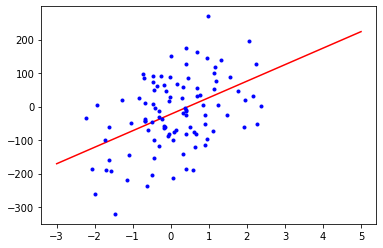

SGD
Mean of Squared Errors =  9332.172462630713
R2 score =  0.19054708957093025


In [35]:
import numpy as np
import random
import sklearn
import matplotlib.pyplot as plt
from scipy import stats
import time


def cost_function(theta, x, y, m):
    y_predict = theta.T.dot(x.T)
    error = np.sum((y_predict-y)**2)
    return error

def gradient_descent(alpha, x, y, ep=0.0000001, max_iter=100000):

    converged = False
    iter = 0
    m = x.shape[0] # number of samples

    # initial theta
    t = np.random.random((x.shape[1],1))
   
    # total error, J(theta)
    J = cost_function(t,x,y,m)
  
    # Iterate Loop
    while not converged:
        
        
        rand_ind = np.random.randint(0,m)
        #print(rand_ind)
        X_i = x[rand_ind,:]
        y_i = y[rand_ind].reshape(1,1)
        
        y_predict = t.T.dot(X_i)
        error = y_predict-y_i
        X_i = X_i.reshape(1,x.shape[1])
        grad = X_i.T.dot(error.T)
        
        alpha = 0.001 #Learning rate
        decay = alpha/max_iter
        alpha *= 1/(1+decay*iter)
        #print("learning schedule = ", alpha)
        
        t = t - alpha * (1/1) * (grad)
        
        # error
        e = cost_function(t,X_i,y_i,m)
        
        if abs(J-e) <= ep:
            print("Converged, iterations: ", iter, "/", max_iter)
            converged = True
    
        J = e   # update error s
        iter += 1  # update iter
    
        if iter == max_iter:
            print('Max iterations exceeded!')
            converged = True

    return t


if __name__ == '__main__':

    #x, y = make_regression(n_samples=100, n_features=2, n_informative=1, random_state=0, noise=35)
    #x_b = np.c_[np.ones((x.shape[0],1)),x]
    
    alpha = 0.01 # learning rate

    theta_sgd = gradient_descent(alpha, x_b, y, max_iter=100000)
    print ("theta ", theta_sgd) 
    
    y_p = x_n_b.dot(theta_sgd)

    import matplotlib.pyplot as plt
    plt.plot(x_n[:,0], y_p,"r-")
    plt.plot(x[:,0],y, "b.")
    plt.show()
   
    from sklearn.metrics import mean_squared_error
    from sklearn.metrics import mean_absolute_error
    from sklearn.metrics import r2_score
    y2_p = x_b.dot(theta_sgd)
    #print("y predict = ",y2_p)
    
    print("SGD")
    print("Mean of Squared Errors = ", mean_squared_error(y, y2_p))
    #print("Mean of Absolute Errors = ", mean_absolute_error(x_b[:,1], y2_p))
    print("R2 score = ", r2_score(y, y2_p))


# Mini-batch GD

Max iterations exceeded!
theta  [[-26.77909944]
 [ 46.1938018 ]
 [ -5.02774656]
 [  3.27924769]]


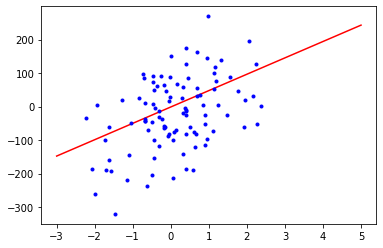

miniGD
Mean of Squared Errors =  9332.172462630713
R2 score =  0.19054708957093025


In [36]:
import numpy as np
import random
import sklearn
import matplotlib.pyplot as plt
from scipy import stats
import time

def cost_function(theta, x, y, m):
    y_predict = theta.T.dot(x.T)
    error = np.sum((y_predict-y)**2)
    return error

def gradient_descent(alpha, x, y, ep=0.00000001, max_iter=10000):

    converged = False
    iter = 0
    m = x.shape[0] # number of samples

    # initial theta
    t = np.random.random((x.shape[1],1))
   
    # total error, J(theta)
    J = cost_function(t,x,y,m)
    
    batch_size = 10
  
    # Iterate Loop
    while not converged:
        
        rand_ind = np.random.permutation(m)
        #print(rand_ind)
        x = x[rand_ind]
        y = y[rand_ind]
        
        for i in range(0,m,batch_size):
            #print("i",i)
            
            X_i = x[i:i+batch_size]
            #print("X_i", X_i)
            y_i = y[i:i+batch_size]
            #print("y_i", y_i)

            y_predict = t.T.dot(X_i.T)
            error = y_predict-y_i
            grad = X_i.T.dot(error.T)

            t = t - alpha * (1/batch_size) * (grad)

            # error
            e = cost_function(t,X_i,y_i,m)

            if abs(J-e) <= ep:
                print("Converged, iterations: ", iter, "/", max_iter)
                converged = True

            J = e   # update error s
            iter += 1  # update iter

            if iter == max_iter:
                print('Max iterations exceeded!')
                converged = True

    return t


if __name__ == '__main__':

    alpha = 0.01 # learning rate

    theta = gradient_descent(alpha, x_b, y, max_iter=100000)
    print ("theta ", theta) 
    
    y_p = x_n_b.dot(theta)

    import matplotlib.pyplot as plt
    plt.plot(x_n[:,0], y_p,"r-")
    plt.plot(x[:,0],y, "b.")
    plt.show()
   
    from sklearn.metrics import mean_squared_error
    #from sklearn.metrics import mean_absolute_error
    from sklearn.metrics import r2_score
    y2_p = x_b.dot(theta_sgd)
    #print("y predict = ",y2_p)
    
    print("miniGD")
    print("Mean of Squared Errors = ", mean_squared_error(y, y2_p))
    #print("Mean of Absolute Errors = ", mean_absolute_error(x_b[:,1], y2_p))
    print("R2 score = ", r2_score(y, y2_p))

# Polynomial regression
Reference: https://towardsdatascience.com/machine-learning-polynomial-regression-with-python-5328e4e8a386

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
df = pd.read_csv('https://s3.us-west-2.amazonaws.com/public.gamelab.fun/dataset/position_salaries.csv')
X = df.iloc[:, 1:2].values
y = df.iloc[:, 2].values
print(df.head())
print(X)
print(y)

            Position  Level  Salary
0   Business Analyst      1   45000
1  Junior Consultant      2   50000
2  Senior Consultant      3   60000
3            Manager      4   80000
4    Country Manager      5  110000
[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


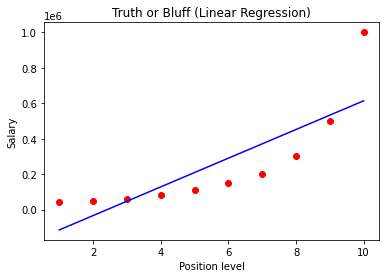

In [38]:
# Fitting Linear Regression to the dataset
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

# Visualizing the Linear Regression results

plt.scatter(X, y, color='red')
plt.plot(X, lin_reg.predict(X), color='blue')
plt.title('Truth or Bluff (Linear Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()


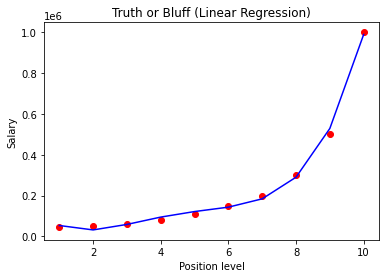

In [39]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(X)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

# Visualizing the Polymonial Regression results

plt.scatter(X, y, color='red')
plt.plot(X, pol_reg.predict(X_poly), color='blue')
plt.title('Truth or Bluff (Linear Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()



[-1.         -0.94736842 -0.89473684 -0.84210526 -0.78947368 -0.73684211
 -0.68421053 -0.63157895 -0.57894737 -0.52631579 -0.47368421 -0.42105263
 -0.36842105 -0.31578947 -0.26315789 -0.21052632 -0.15789474 -0.10526316
 -0.05263158  0.        ]
 coef =  [    0.         22547.99716406 16046.89320731 -5354.01925317
   451.91527007]
Intercept  -17565.502467810642
R^2  0.9924970863729455
 coef =  [    0.         23423.7193433  15682.68428576 -5300.61226091
   449.38150861]
Intercept  -18096.76821678481
R^2  0.9924631585989517
 coef =  [    0.         24413.15495404 15279.92515328 -5242.23310052
   446.63149717]
Intercept  -18725.52951596072
R^2  0.9924240950175068
 coef =  [    0.         25539.36962722 14830.72299914 -5177.85676792
   443.62042675]
Intercept  -19471.32319757878
R^2  0.9923788628743765
 coef =  [    0.         26832.12698569 14324.89387323 -5106.16079859
   440.29048717]
Intercept  -20359.362109303707
R^2  0.9923261168899037
 coef =  [    0.         28330.51012284 13749.06

<BarContainer object of 20 artists>

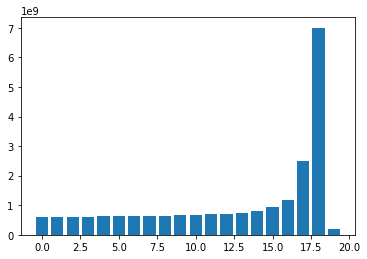

In [40]:
step = 20
end = 0
alphas = np.linspace(-1, end, step)
print(alphas)

mse = []

for a in alphas:
    clf = Ridge(alpha=a) # lambda in lecture, alpha in sklearn
    clf.fit(X_poly, y)
    print(" coef = ", clf.coef_)
    print("Intercept ", clf.intercept_)
    print("R^2 ", clf.score(X_poly,y))
    mse.append(mean_squared_error(y,clf.predict(X_poly)))

t = range(0, len(mse))
print(type(t))
print('mse',mse)
plt.bar(t,mse)


Coef  [      0.         -211002.33100292   94765.44289063  -15463.28671331
     890.15151515]
Intercept  184166.66666719737
R^2  0.9973922891706614
MSE polynomial =  210343822.84382215


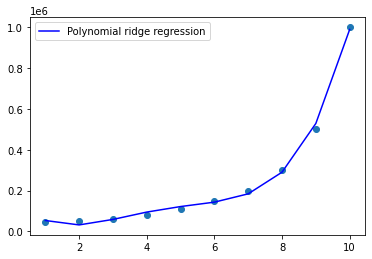

In [41]:
from sklearn.linear_model import Ridge

#poly_reg=PolynomialFeatures(degree=4)

#X_poly = poly_reg.fit_transform(X)

clf = Ridge(alpha=0) # lambda in lecture, alpha in sklearn
clf.fit(X_poly, y)

print("Coef ", clf.coef_)
print("Intercept ", clf.intercept_)
print("R^2 ", clf.score(X_poly,y))

y_pred = clf.predict(X_poly)
print("MSE polynomial = ", mean_squared_error(y,y_pred))

plt.scatter(X,y)
plt.plot(X,y_pred,'b-',label="Polynomial ridge regression")
plt.legend() 
plt.show()

[ 0.1  1.2  2.3  3.4  4.5  5.6  6.7  7.8  8.9 10. ]
 coef =  [ 0.00000000e+00  1.12110253e+05 -2.06596830e+04  7.24723940e+00
  1.97671366e+02]
Intercept  -74661.75413269532
R^2  0.9873845083921349
 coef =  [ 0.00000000e+00  1.12093599e+05 -2.06560420e+04  6.97703017e+00
  1.97676385e+02]
Intercept  -74641.31427746045
R^2  0.9873849498472708
 coef =  [ 0.00000000e+00  1.12076945e+05 -2.06524010e+04  6.70682095e+00
  1.97681404e+02]
Intercept  -74620.87442222447
R^2  0.9873853910521457
 coef =  [ 0.00000000e+00  1.12060292e+05 -2.06487600e+04  6.43661172e+00
  1.97686422e+02]
Intercept  -74600.4345669907
R^2  0.9873858320067597
 coef =  [ 0.00000000e+00  1.12043638e+05 -2.06451189e+04  6.16640250e+00
  1.97691441e+02]
Intercept  -74579.99471175915
R^2  0.9873862727111125
 coef =  [ 0.00000000e+00  1.12026984e+05 -2.06414779e+04  5.89619327e+00
  1.97696460e+02]
Intercept  -74559.55485652195
R^2  0.9873867131652043
 coef =  [ 0.00000000e+00  1.12010331e+05 -2.06378369e+04  5.62598405e+00

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.088e+09, tolerance: 8.066e+07
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.089e+09, tolerance: 8.066e+07
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisa

<BarContainer object of 10 artists>

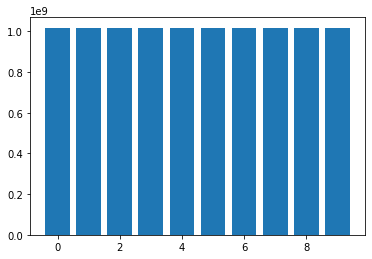

In [44]:
from sklearn.linear_model import Lasso

#print(X_poly)
lambda_step = 10
end = 10
alphas = np.linspace(0.1, end, lambda_step) #using alpha = 0 with the Lasso object is not advised
print(alphas)
mse = []
for a in alphas:
    clf = Lasso(alpha=a)
    clf.fit(X_poly, y)
    print(" coef = ", clf.coef_)
    print("Intercept ", clf.intercept_)
    print("R^2 ", clf.score(X_poly,y))
    mse.append(mean_squared_error(y,clf.predict(X_poly)))
t = range(0, len(mse))
print(mse)
plt.bar(t,mse)

In [43]:
# Predicting a new result with Linear Regression
print(lin_reg.predict([[5.5]]))
#output should be 249500

# Predicting a new result with Polymonial Regression
print(pol_reg.predict(poly_reg.fit_transform([[5.5]])))
#output should be 132148.43750003

[249500.]
[132148.43750002]
